# Module imports, aka, why reinvent the wheel ?

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

# A data scientist wihtout data is, well, a firefighter without a hose !

In [2]:
'''Where are we living ?'''
%pwd

'/Users/ram/Desktop/DAMG6106_AKA_INFO6101'

In [4]:
#Read in both parts of the Titanic dataset

my_df_1 = pd.read_csv("/Users/ram/Desktop/DAMG6106_AKA_INFO6101/Titanic.csv")
my_df_2 = pd.read_csv("/Users/ram/Desktop/DAMG6106_AKA_INFO6101/Titanic_II.csv")

print(my_df_1.shape)
print(my_df_2.shape)

(891, 12)
(418, 12)


In [5]:
# Get column names of your dataframe

print(my_df_1.columns)
print(my_df_2.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# The things you can do with two dataframes...

In [6]:
# Merge the two dataframes into the same dataframe using append

merged_df = my_df_1.append(my_df_2)
merged_df.shape

(1309, 12)

In [7]:
#There's always more than one way of doing things...
#Merge the two dataframes into the same dataframe using concat

df_list = [my_df_1,my_df_2]
merged_df_2 = pd.concat(df_list, axis = 1)
merged_df_2.shape

(891, 24)

In [8]:
merged_df_2.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Write out the merged dataframe as a .csv file

merged_df.to_csv("/Users/ram/Desktop/DAMG6106_AKA_INFO6101/merged_data.csv",index = False)


# The world of functions...and modularization !

In [10]:
'''Before we dive into code, whiteboarding is the way to go'''

def adder(num1,num2):
    return num1 + num2

In [11]:
adder(["milk","water"],[10,100])

['milk', 'water', 10, 100]

In [12]:
# How can we define our own function and make new columns with derived data

def child_age(x):
    if x < 12:
        return "Child"
    elif x >= 12:
        return "Adult"
    else:
        return "unknown"

merged_df["Status"] = merged_df["Age"].apply(child_age)

merged_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [13]:
merged_df[["Age","Status"]].head(n =7)

,Age,Status
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,unknown
6,54.0,Adult


# Data analysts, here we go...

In [14]:
# How to make summary statistics of a column
merged_df["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [15]:
my_list = ["Milk","Bread",12,14]

# Flow of control part II: for loops

In [16]:
for thing in my_list:
    print(thing)

Milk
Bread
12
14


# Can we make a dataframe with our data ?

In [17]:
# Make a dataframe by joining lists of data

Names = ["Jason","Laura","Johnson","Meuller","Anna"]

City = ["Seattle","San Francisco", "Portland", "Santa Cruz", "Athens"]

State = ["Washington", "California", "Oregon", "California", "Georgia"]

Income = [70000,80000,105000,45000,90000]

our_df = pd.DataFrame({"Name": Names, "City": City, 
                       "State": State, "Annual Income": Income})

our_df.head()

,Name,City,State,Annual Income
0,Jason,Seattle,Washington,70000
1,Laura,San Francisco,California,80000
2,Johnson,Portland,Oregon,105000
3,Meuller,Santa Cruz,California,45000
4,Anna,Athens,Georgia,90000


In [18]:
# Find and replace in our dataframe

rep_df = our_df.replace(to_replace = "California",
                        value = "CA",inplace = False)

rep_df.head()

,Name,City,State,Annual Income
0,Jason,Seattle,Washington,70000
1,Laura,San Francisco,CA,80000
2,Johnson,Portland,Oregon,105000
3,Meuller,Santa Cruz,CA,45000
4,Anna,Athens,Georgia,90000


In [19]:
our_df.head()

,Name,City,State,Annual Income
0,Jason,Seattle,Washington,70000
1,Laura,San Francisco,California,80000
2,Johnson,Portland,Oregon,105000
3,Meuller,Santa Cruz,California,45000
4,Anna,Athens,Georgia,90000


<AxesSubplot:xlabel='City'>

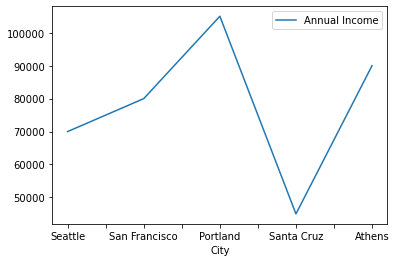

In [20]:
rep_df.plot(x = "City", y = "Annual Income", kind = "line")

# Drill Time !

Write a function that takes as input the fare, and if it's below 10, outputs "inexpensive", and if it's above 10 returns "expensive". Use this function to add a new column "Fare status" to your dataframe

Get all column names of your new dataframe

Write this dataframe to disk as a csv file

Calculate summary statistics for the age column of your dataframe. What is the mean age ?

What is the average age of passengers who travelled first class ?

What is the average fare paid by passengers who travelled first class ?

Replace male by M and female by F in the dataframe

Scatter plot fares against passenger Age